In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:

from google.colab import drive
drive.mount('/content/drive')
# Load observed data
data=pd.read_csv('/content/drive/MyDrive/spring2025/Modeling_Lab/[HW4]_Practical_class_4/LV_data.csv')
t_data = data['Time'].values
x_data = data['Prey'].values
y_data = data['Predator'].values
z0=[x_data[0],y_data[0]]
z0

Mounted at /content/drive


[np.float64(30.0), np.float64(4.0)]

In [16]:
data.head()

,Time,Prey,Predator
0,0,30.0,4.0
1,1,47.2,6.1
2,2,70.2,9.8
3,3,77.4,35.2
4,4,36.3,59.4


In [3]:
# Define the Lotka-Volterra ODE system
def lotka_volterra(z, t, α, β, γ, δ):
  x, y = z
  return [α*x - β*x*y,

          δ*x*y - γ*y]


In [4]:
# Objective function to minimize (mean squared error)
def objective_mse(params):
  α, β, γ, δ=params
  sol=odeint(lotka_volterra,z0,t_data,args=(α,β,γ,δ))
  x_sim,y_sim=sol.T

  return np.mean((x_sim - x_data)**2 + (y_sim - y_data)**2)



def objective_mae(params):
    α, β, γ, δ = params
    sol = odeint(lotka_volterra, z0, t_data, args=(α,β,γ,δ))
    x_sim, y_sim = sol.T
    return np.mean(np.abs(x_sim - x_data) + np.abs(y_sim - y_data))





In [5]:
# Initial guess
# for init in [[0.5,0.1,0.1,0.5],
#              [2,  2,  0.1, 1  ],
#              [0.5,5,  0.01,0.2]]:
initial_guess = [1,1,1,1]


# Optimization using Nelder-Mead
result_mse = minimize(objective_mse, initial_guess, method='Nelder-Mead')
result_mae=minimize(objective_mae,initial_guess,method='Nelder-Mead')


In [6]:
# Extract optimal parameters and print them
print("MSE fit →", result_mse.x, "error=", result_mse.fun)
print("MAE fit →", result_mae.x, "error=", result_mae.fun)



MSE fit → [1.4621374  1.26082679 0.01492048 0.77020544] error= 1803.2076000589263
MAE fit → [1.77615868 1.95356669 0.01107482 0.57944283] error= 44.05264255099632


In [13]:
# Simulate with estimated parameters
α_mse, β_mse, γ_mse, δ_mse = result_mse.x
print('mse_params:', α_mse,β_mse,γ_mse,δ_mse)
α_mae, β_mae, γ_mae, δ_mae=result_mae.x
print('MAE_params:', α_mae,β_mae,γ_mae,δ_mae)
sol_mse = odeint(lotka_volterra, z0, t_data, args=(α_mse, β_mse, γ_mse, δ_mse))
sol_mae=odeint(lotka_volterra,z0,t_data,args=(α_mae,β_mae,γ_mae,δ_mae))



mse_params: 1.4621373960890343 1.2608267897439835 0.01492048258263974 0.7702054445389616
MAE_params: 1.7761586830546214 1.9535666864688204 0.011074820412770555 0.5794428321335275


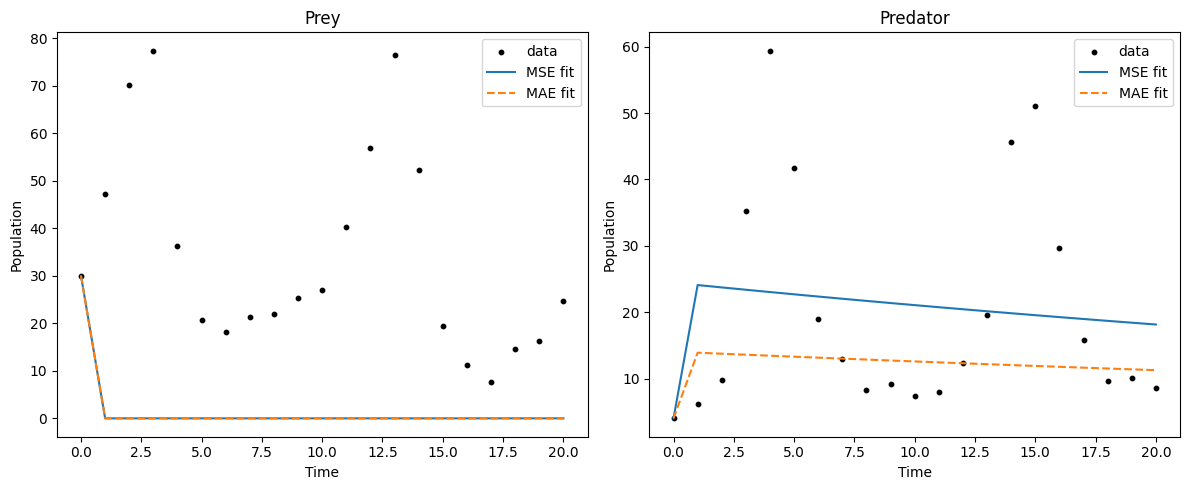

In [14]:
# Plotting

# 6) Plot
plt.figure(figsize=(12,5))

# prey
plt.subplot(1,2,1)
plt.scatter(t_data, x_data, c='k', s=10, label='data')
plt.plot(t_data, sol_mse[:,0], 'C0-', label='MSE fit')
plt.plot(t_data, sol_mae[:,0], 'C1--', label='MAE fit')
plt.title('Prey')
plt.xlabel('Time'); plt.ylabel('Population')
plt.legend()

# predator
plt.subplot(1,2,2)
plt.scatter(t_data, y_data, c='k', s=10, label='data')
plt.plot(t_data, sol_mse[:,1], 'C0-', label='MSE fit')
plt.plot(t_data, sol_mae[:,1], 'C1--', label='MAE fit')
plt.title('Predator')
plt.xlabel('Time'); plt.ylabel('Population')
plt.legend()

plt.tight_layout()
plt.show()